In [1]:
import gc

import keras

import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn


class_names = ["Blues", "Classical", "Country", "Disco", "Hiphop", "Jazz", "Metal", "Pop", "Reggae", "Rock"]
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
data = np.load(r'C:\Users\dpetr\Desktop\sxoli\Level 3\Individual\datasets\GTZAN\features.npz')
labels = data['labels']

In [3]:
mfcc = data['mfcc']
print(mfcc.shape, mfcc.dtype, labels.shape, labels.dtype)

(9986, 20, 130) float32 (9986,) int32


In [28]:
def build_model(input_shape):

    #create model
    model = keras.Sequential()

    #1st conv layer
    model.add(keras.layers.Conv2D(64, (3, 3), input_shape=input_shape, kernel_regularizer=keras.regularizers.l2(0.00005)))
    model.add(keras.layers.MaxPool2D((2,2), strides=(2,2), padding='same')) # kernel size (2,2)
    model.add(keras.layers.BatchNormalization(momentum=0.98))
    model.add(keras.layers.ReLU())
    # model.add(keras.layers.Dropout(0.3))

    #2nd conv layer
    model.add(keras.layers.Conv2D(128, (3, 3), input_shape=input_shape, kernel_regularizer=keras.regularizers.l2(0.00005)))
    model.add(keras.layers.MaxPool2D((2,2), strides=(2,2), padding='same'))
    model.add(keras.layers.BatchNormalization(momentum=0.98))
    model.add(keras.layers.ReLU())
    # model.add(keras.layers.Dropout(0.3))

    #3rd conv layer
    model.add(keras.layers.Conv2D(128, (3, 3), input_shape=input_shape, kernel_regularizer=keras.regularizers.l2(0.00005)))
    model.add(keras.layers.MaxPool2D((2,2), strides=(2,2), padding='same'))
    model.add(keras.layers.BatchNormalization(momentum=0.98))
    model.add(keras.layers.ReLU())
    # model.add(keras.layers.Dropout(0.3))

    model.add(keras.layers.GlobalAveragePooling2D())

    # model.add(keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001))) # 512 best # l2 0.001
    # model.add(keras.layers.Dropout(0.65)) #0.6
    #
    # model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)))
    # model.add(keras.layers.Dropout(0.65)) #0.6

    model.add(keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)))
    model.add(keras.layers.Dropout(0.65))

    #output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

Train:  (8987, 20, 130, 1) (8987,) Test:  (999, 20, 130, 1) (999,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 128, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 64, 64)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 9, 64, 64)        256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 9, 64, 64)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 62, 128)        73856     
                                                       

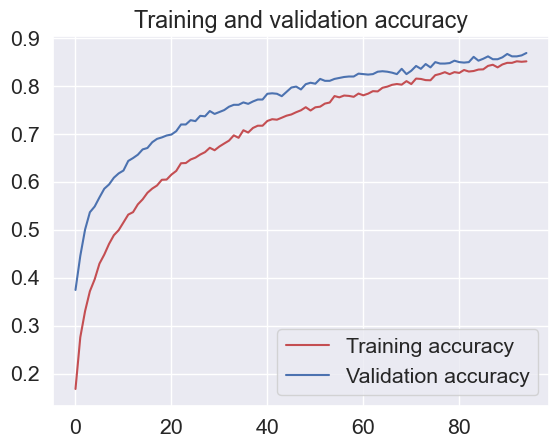

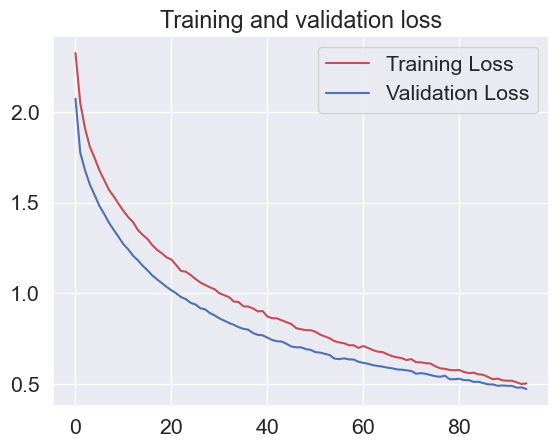

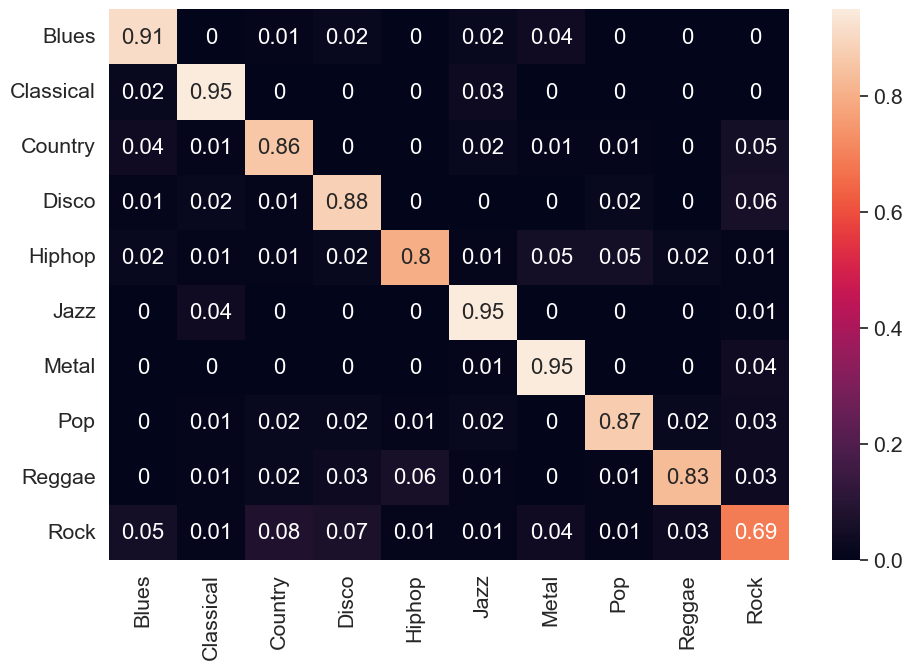

Train:  (8987, 20, 130, 1) (8987,) Test:  (999, 20, 130, 1) (999,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 128, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 64, 64)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 9, 64, 64)        256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 9, 64, 64)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 62, 128)        73856     
                                                       

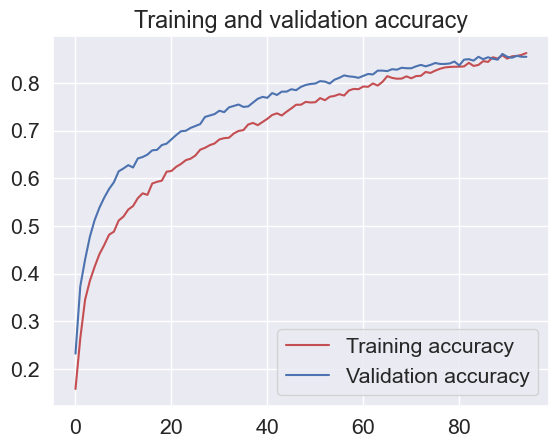

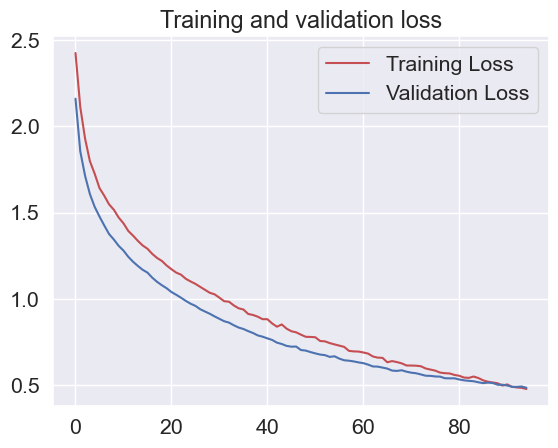

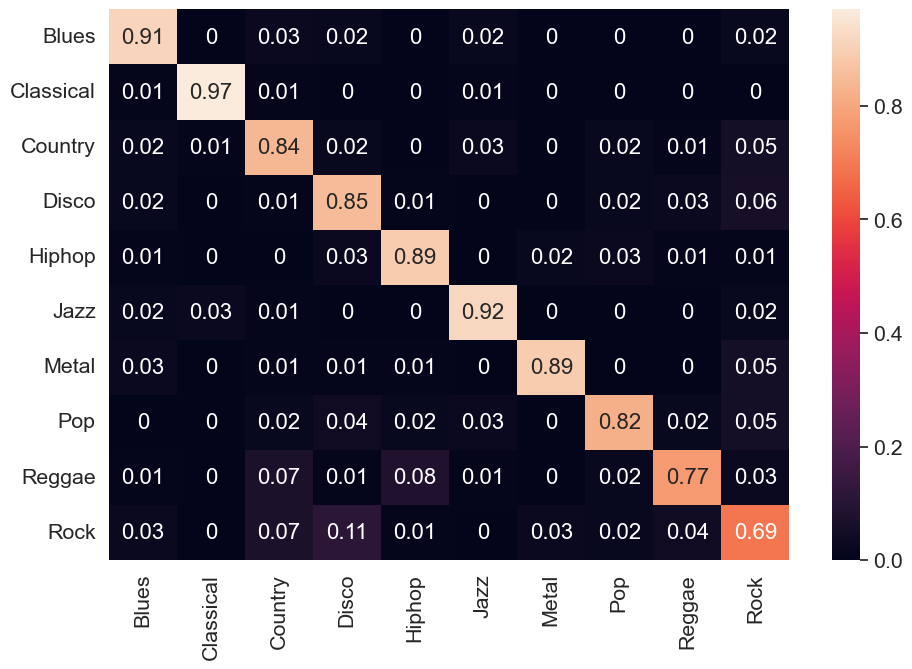

Train:  (8987, 20, 130, 1) (8987,) Test:  (999, 20, 130, 1) (999,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 128, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 64, 64)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 9, 64, 64)        256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 9, 64, 64)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 62, 128)        73856     
                                                       

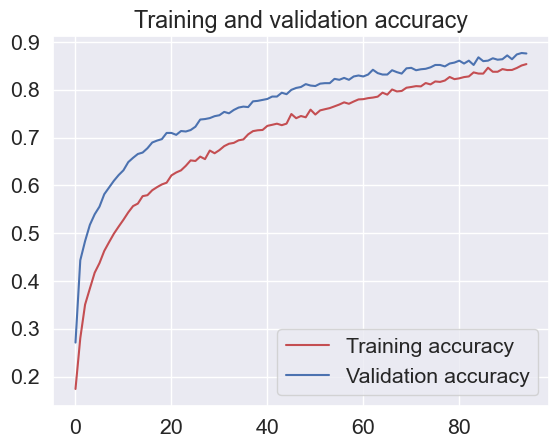

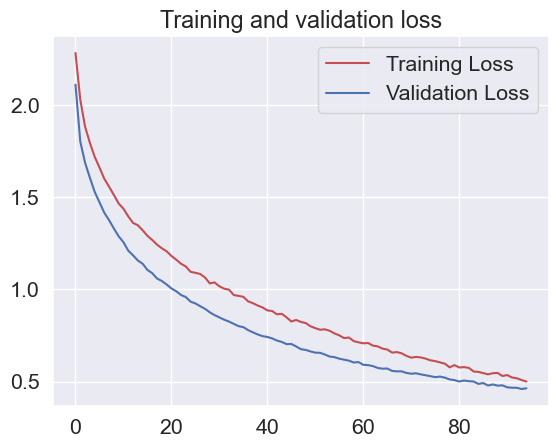

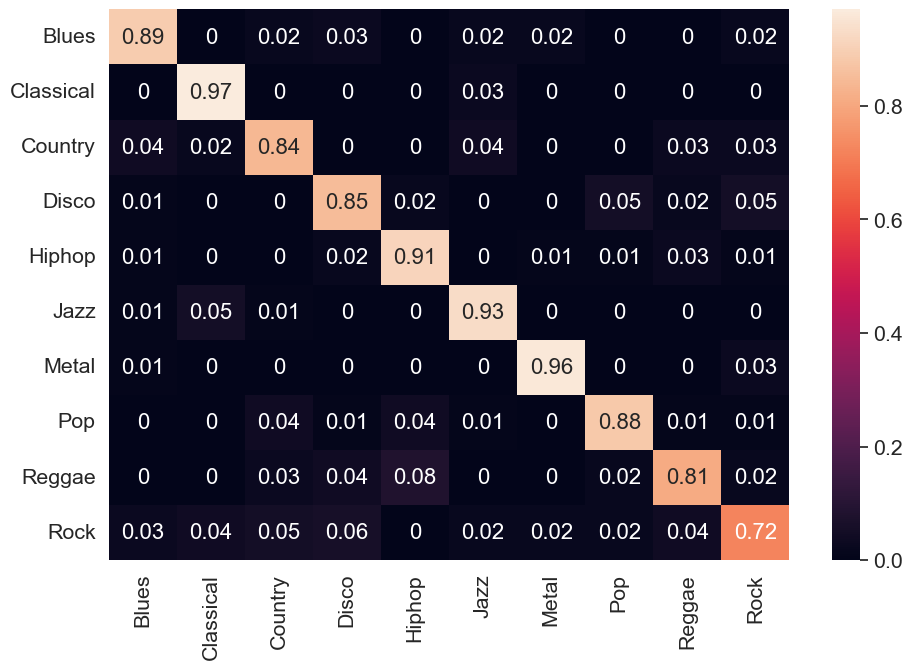

Train:  (8987, 20, 130, 1) (8987,) Test:  (999, 20, 130, 1) (999,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 128, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 64, 64)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 9, 64, 64)        256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 9, 64, 64)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 62, 128)        73856     
                                                       

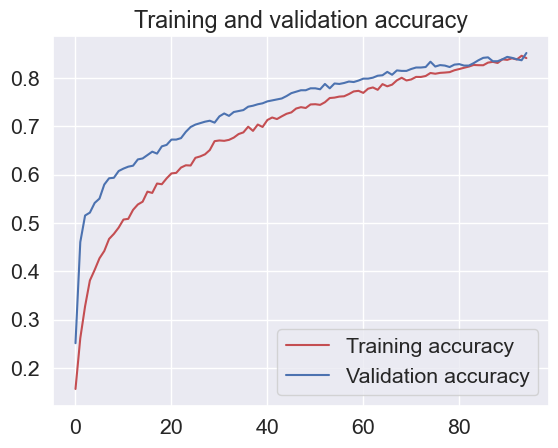

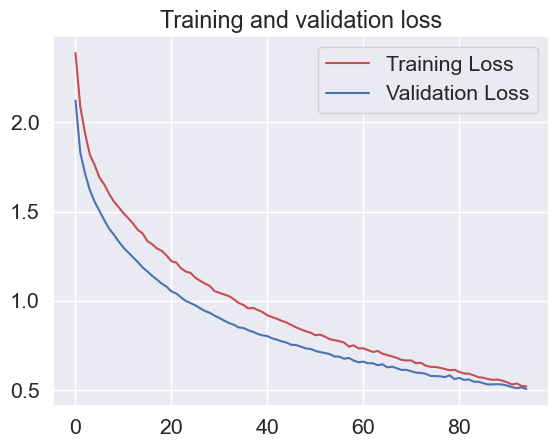

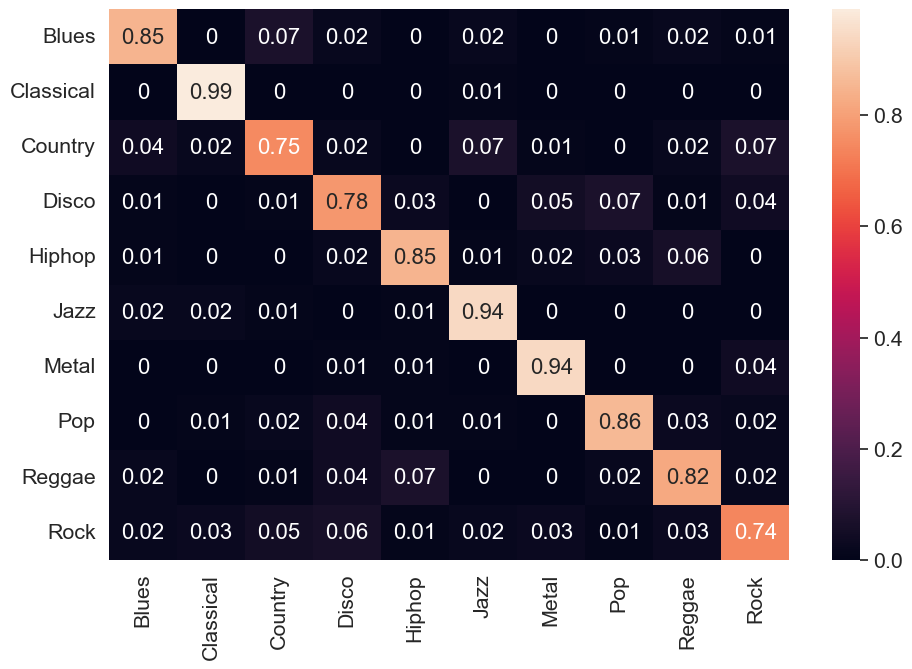

Train:  (8987, 20, 130, 1) (8987,) Test:  (999, 20, 130, 1) (999,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 128, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 64, 64)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 9, 64, 64)        256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 9, 64, 64)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 62, 128)        73856     
                                                       

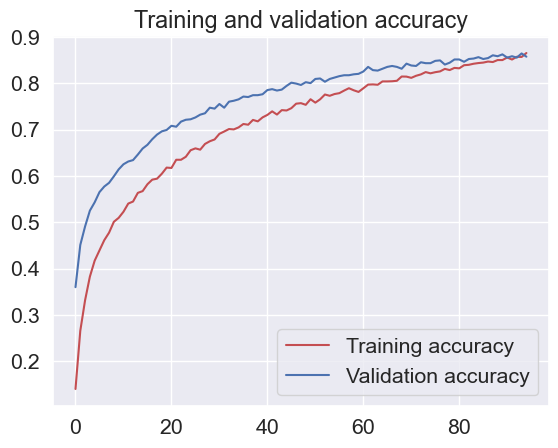

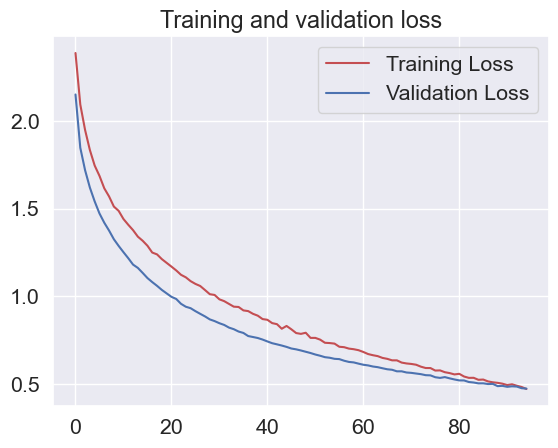

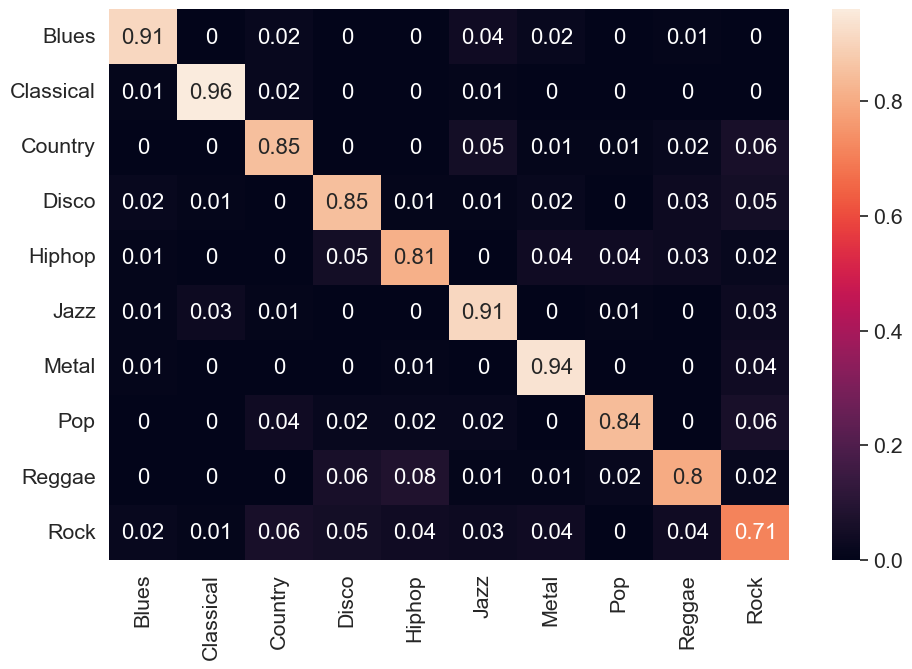

Train:  (8987, 20, 130, 1) (8987,) Test:  (999, 20, 130, 1) (999,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 128, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 64, 64)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 9, 64, 64)        256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 9, 64, 64)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 62, 128)        73856     
                                                       

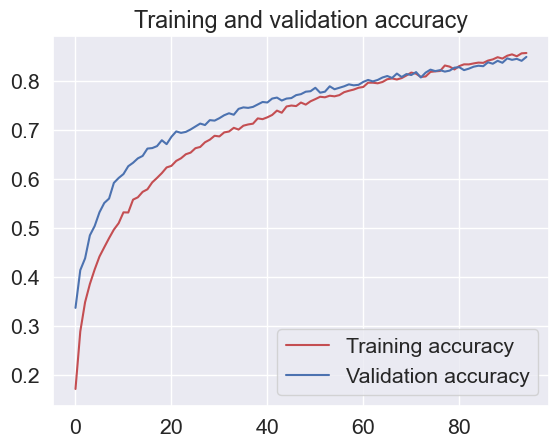

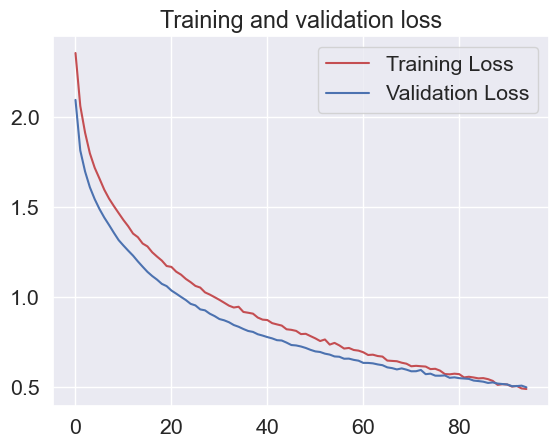

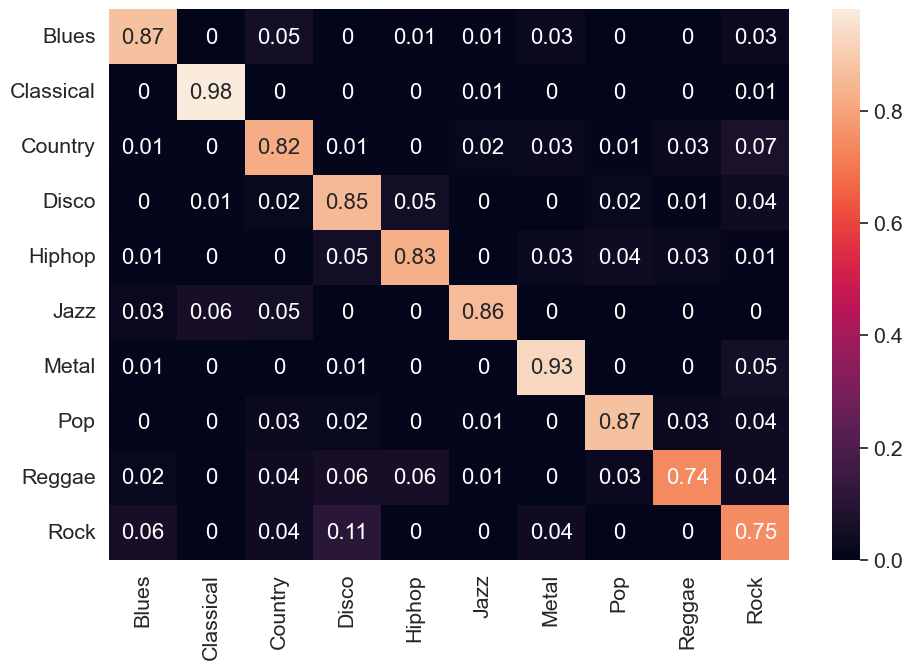

Train:  (8988, 20, 130, 1) (8988,) Test:  (998, 20, 130, 1) (998,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 128, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 64, 64)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 9, 64, 64)        256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 9, 64, 64)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 62, 128)        73856     
                                                       

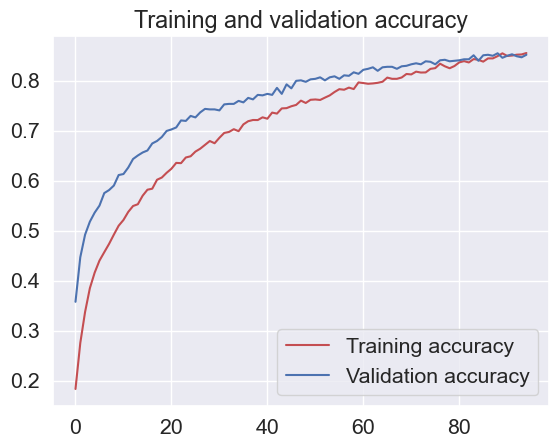

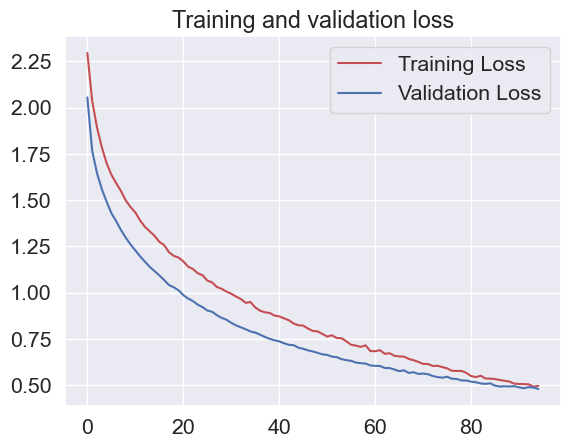

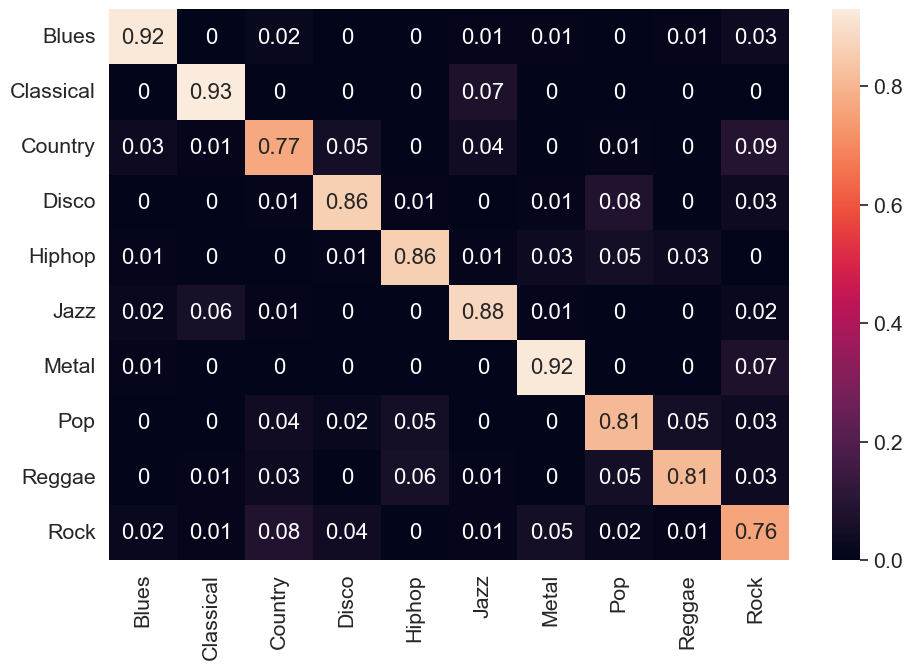

Train:  (8988, 20, 130, 1) (8988,) Test:  (998, 20, 130, 1) (998,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 128, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 64, 64)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 9, 64, 64)        256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 9, 64, 64)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 62, 128)        73856     
                                                       

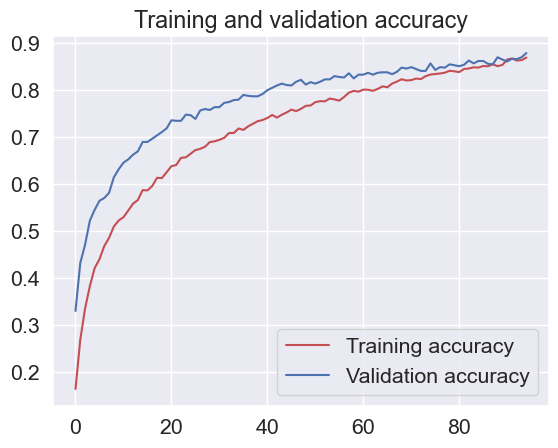

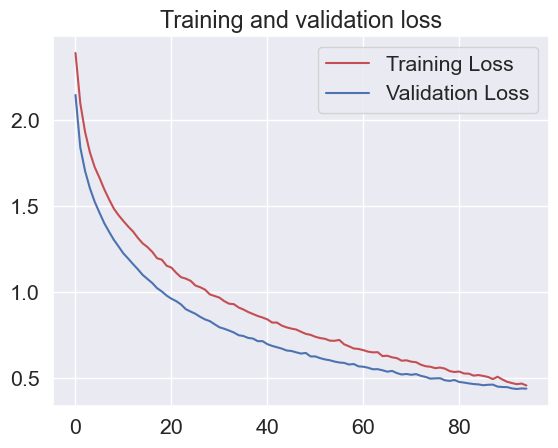

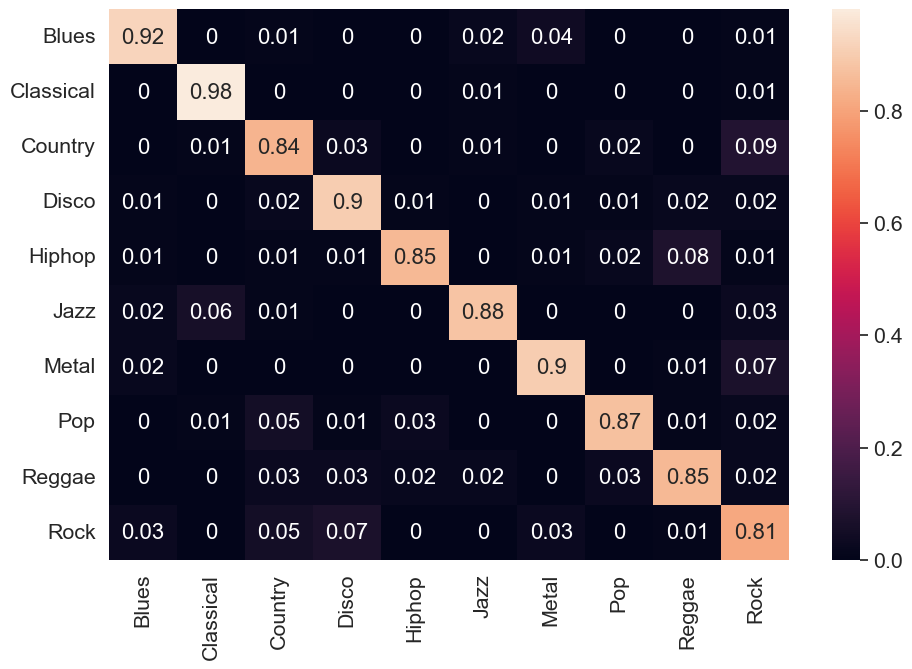

Train:  (8988, 20, 130, 1) (8988,) Test:  (998, 20, 130, 1) (998,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 128, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 64, 64)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 9, 64, 64)        256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 9, 64, 64)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 62, 128)        73856     
                                                       

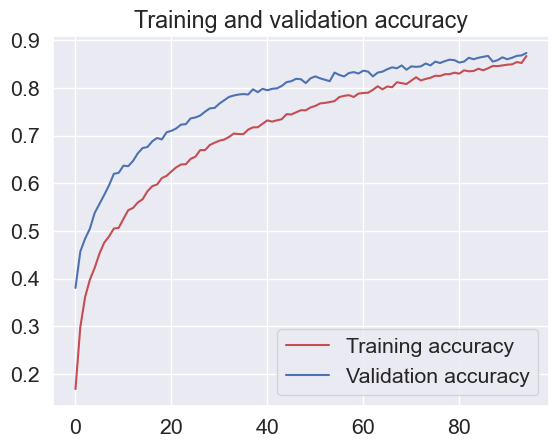

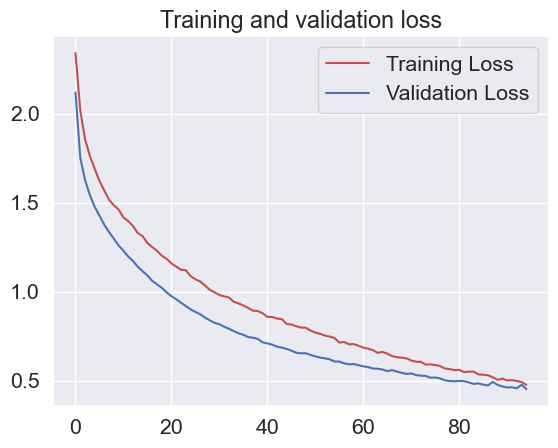

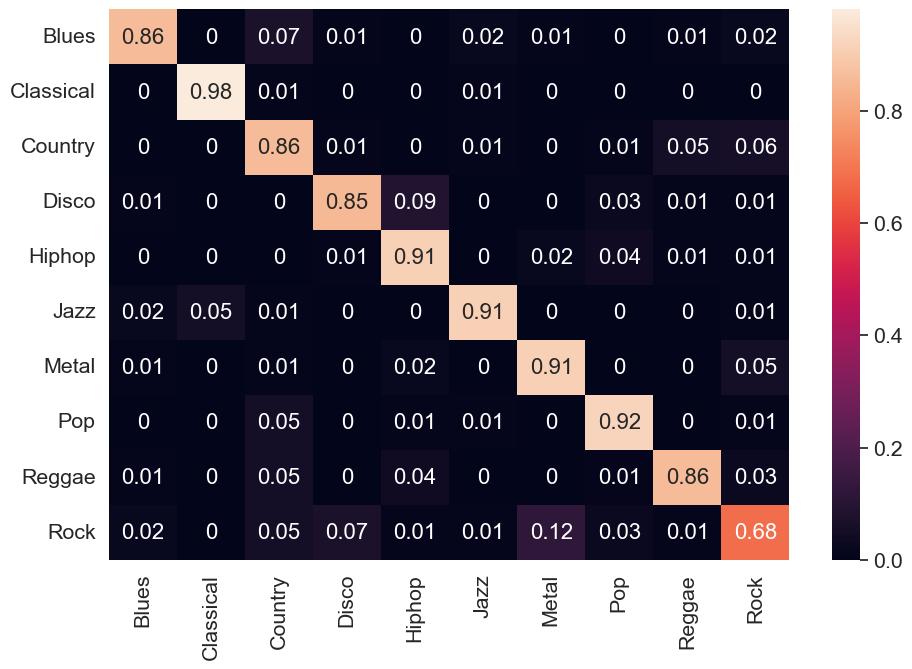

Train:  (8988, 20, 130, 1) (8988,) Test:  (998, 20, 130, 1) (998,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 128, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 64, 64)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 9, 64, 64)        256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 9, 64, 64)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 62, 128)        73856     
                                                       

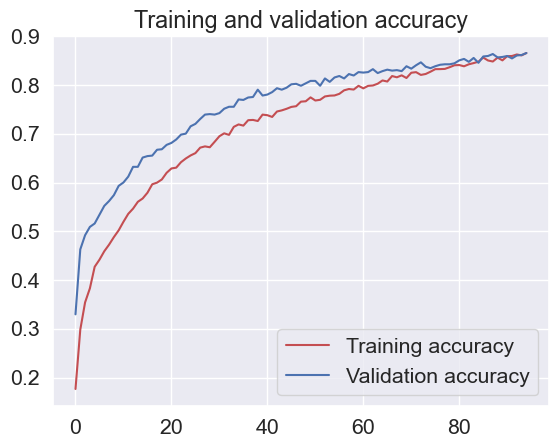

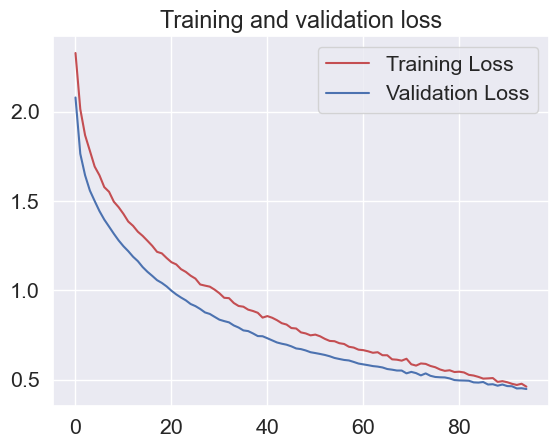

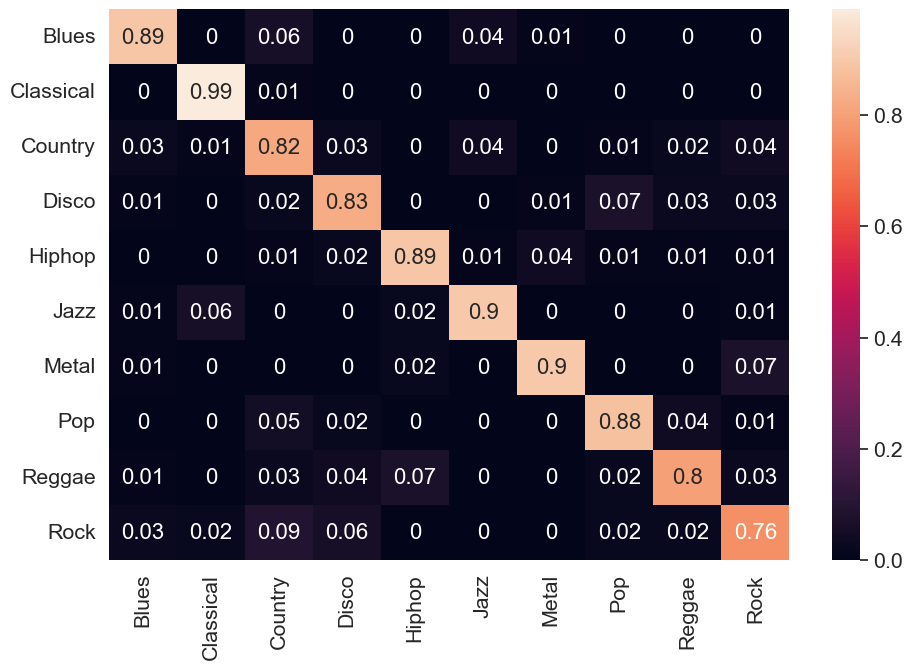

In [48]:
x, y = shuffle(mfcc, labels)
skf = StratifiedKFold(n_splits=10)
# kf = KFold(n_splits=10, shuffle=True)
test_accuracies = []
all_conf_mat = np.empty(shape=(10, 10, 10))
for fold, (train_index, test_index) in enumerate(skf.split(x, y)):
    x_train = x[train_index]
    y_train = y[train_index]
    x_test = x[test_index]
    y_test = y[test_index]

    x_train = x_train[..., np.newaxis]
    x_test = x_test[..., np.newaxis]

    print('Train: ', x_train.shape, y_train.shape, 'Test: ', x_test.shape, y_test.shape)

    mean = np.mean(x_train)
    std = np.std(x_train)
    x_train = (x_train - mean) / std
    x_test = (x_test - mean) / std

    input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3])
    model = build_model(input_shape)
    optimizer = keras.optimizers.Adam(learning_rate=0.00001) # 0.0001 # 0.00006
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    model.summary()
    keras.utils.plot_model(model, to_file=r'C:\Users\dpetr\Desktop\sxoli\Level 3\Individual\images\cnn-mfcc-k-fold.png', show_shapes=True, show_layer_activations=True)

    # checkpoint_filepath = 'CNN-KFoldCV_Checkpoint/' + str(fold)
    # model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True, initial_value_threshold=0.8, verbose=1)

    history = model.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=95,
                        batch_size=32,
                        callbacks=keras.callbacks.EarlyStopping(monitor='val_loss',
                                                                patience=5,
                                                                verbose=1,
                                                                restore_best_weights=True)
                        )

    # model.load_weights(checkpoint_filepath)

    test_error, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
    test_accuracies.append(test_accuracy)

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy' + str())
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    print("Accuracy on test set is:{}".format(test_accuracy))

    predictions = model.predict(x_test, batch_size=32, verbose=1)
    predicted_indexes = []
    for prediction in predictions:
        predicted_indexes.append(np.argmax(prediction))
    conf_mat = confusion_matrix(y_test, predicted_indexes, normalize= 'true')
    conf_mat = np.round(conf_mat, 2)
    all_conf_mat[fold] = conf_mat
    conf_mat_df = pd.DataFrame(conf_mat, columns= class_names, index= class_names)
    plt.figure(figsize = (10,7), dpi = 100)
    sn.set(font_scale=1.4)
    sn.heatmap(conf_mat_df, annot=True, annot_kws={"size": 16}) # font size
    plt.tight_layout()

    plt.show()

    del model
    keras.backend.clear_session()
    gc.collect()

In [47]:
del model
keras.backend.clear_session()
gc.collect()

2612

In [49]:
test_accuracies = np.array(test_accuracies)
print(test_accuracies, test_accuracies.dtype)
print('Mean = ', np.mean(test_accuracies))
print('Standard deviation = ', np.std(test_accuracies))

[0.86886889 0.85485488 0.87587589 0.85185188 0.85785788 0.84984982
 0.85170341 0.87975949 0.87374747 0.86573148] float64
Mean =  0.8630101084709167
Standard deviation =  0.010590968295307902


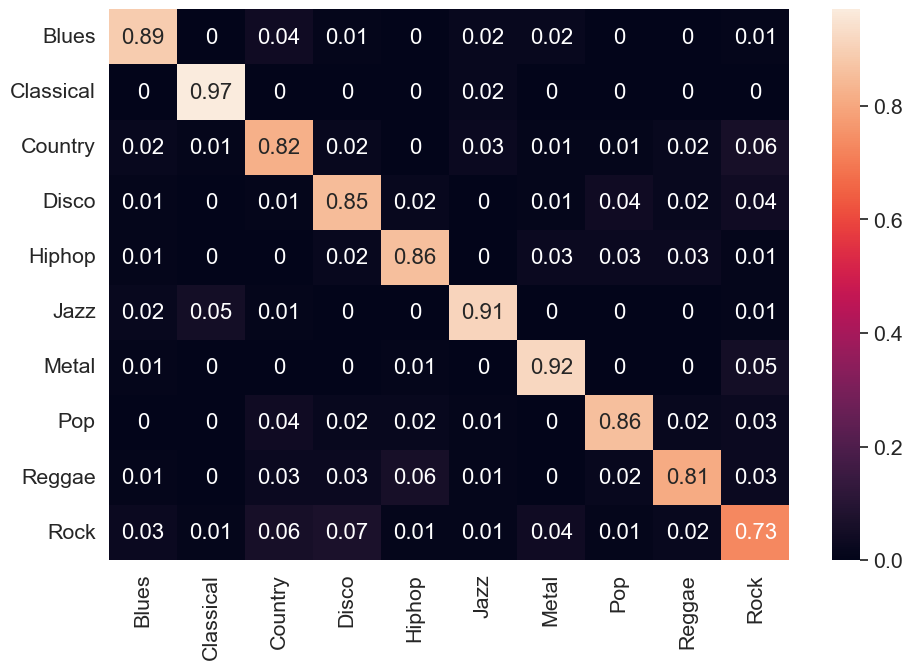

In [51]:
mean_conf_mat = np.mean(all_conf_mat, axis=0)
mean_conf_mat = np.round(mean_conf_mat, 2)
mean_conf_mat_df = pd.DataFrame(mean_conf_mat, columns= class_names, index= class_names)
plt.figure(figsize = (10,7), dpi = 100)
sn.set(font_scale=1.4)
sn.heatmap(mean_conf_mat_df, annot=True, annot_kws={"size": 16}) # font size
plt.tight_layout()

In [52]:
x, y = shuffle(x, y)
x = x[..., np.newaxis]

print('Shape: ', x.shape, y.shape)

mean = np.mean(x)
std = np.std(x)
x = (x - mean) / std

Shape:  (9986, 20, 130, 1) (9986,)


In [53]:
input_shape = (x.shape[1], x.shape[2], x.shape[3])
model = build_model(input_shape)
optimizer = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

model.summary()

# checkpoint_filepath = 'CNN-KFoldCV_Checkpoint_Final/'
# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True, initial_value_threshold=0.8, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 128, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 64, 64)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 9, 64, 64)        256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 9, 64, 64)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 62, 128)        73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 31, 128)       0

Epoch 1/95
313/313 [==============================] - 4s 11ms/step - loss: 2.2852 - accuracy: 0.1796
Epoch 2/95
313/313 [==============================] - 3s 11ms/step - loss: 2.0007 - accuracy: 0.2962
Epoch 3/95
313/313 [==============================] - 3s 10ms/step - loss: 1.8595 - accuracy: 0.3595
Epoch 4/95
313/313 [==============================] - 3s 10ms/step - loss: 1.7569 - accuracy: 0.4000
Epoch 5/95
313/313 [==============================] - 3s 10ms/step - loss: 1.6855 - accuracy: 0.4255
Epoch 6/95
313/313 [==============================] - 3s 10ms/step - loss: 1.6233 - accuracy: 0.4505
Epoch 7/95
313/313 [==============================] - 3s 10ms/step - loss: 1.5753 - accuracy: 0.4651
Epoch 8/95
313/313 [==============================] - 3s 10ms/step - loss: 1.5222 - accuracy: 0.4881
Epoch 9/95
313/313 [==============================] - 3s 10ms/step - loss: 1.4894 - accuracy: 0.5005
Epoch 10/95
313/313 [==============================] - 3s 11ms/step - loss: 1.4452 - accura

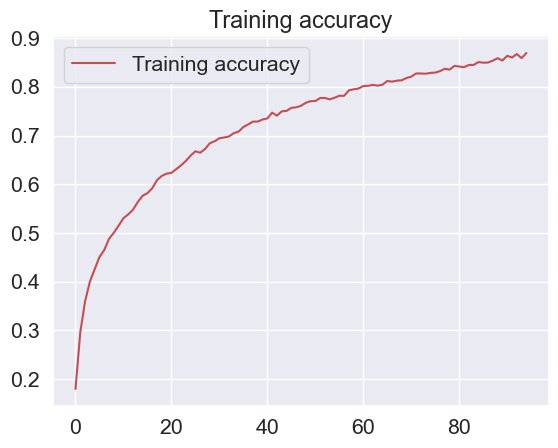

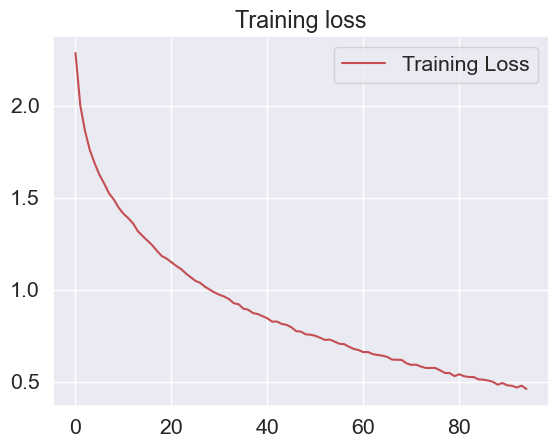

In [54]:
history = model.fit(x, y,
          epochs=95,
          batch_size=32
          )

# test_error, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy' + str())
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

# print("Accuracy on test set is:{}".format(test_accuracy))



In [55]:
model.save('saved_models/CNN-Kfold-MFCC-final')
mean_std = np.array([mean, std], dtype=np.float32)
np.save('saved_models/CNN-Kfold-MFCC-final-mean_std/mean_std.npy', mean_std)

INFO:tensorflow:Assets written to: saved_models/CNN-Kfold-MFCC-final\assets


INFO:tensorflow:Assets written to: saved_models/CNN-Kfold-MFCC-final\assets


In [44]:
np.save('saved_models/CNN-Kfold-MFCC-final-mean_std/mean_std.npy', mean_std)